# EDA

In [2]:
import pandas as pd

In [3]:
train_path = "train.csv"
test_path = "test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

## 데이터 크기 및 기본 정보 확인

In [4]:
# 데이터 크기 확인
print("Train 데이터 크기:", train_df.shape)
print("Test 데이터 크기:", test_df.shape)

# 컬럼 정보 확인
print("\nTrain 데이터 정보:")
print(train_df.info())

print("\nTest 데이터 정보:")
print(test_df.info())

# 첫 5개 샘플 확인
print("\nTrain 데이터 샘플:")
print(train_df.head())

print("\nTest 데이터 샘플:")
print(test_df.head())


Train 데이터 크기: (11263, 3)
Test 데이터 크기: (1689, 2)

Train 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11263 entries, 0 to 11262
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      11263 non-null  object
 1   input   11263 non-null  object
 2   output  11263 non-null  object
dtypes: object(3)
memory usage: 264.1+ KB
None

Test 데이터 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      1689 non-null   object
 1   input   1689 non-null   object
dtypes: object(2)
memory usage: 26.5+ KB
None

Train 데이터 샘플:
            ID                                              input  \
0  TRAIN_00000  별 한 게토 았깝땀. 왜 싸람듯릭 펼 1캐를 쥰눈징 컥꺾폰 싸람믐롯섞 맒록 섧멍핥쟈...   
1  TRAIN_00001                             잚많 쟉꼬 갉 태 좋눼욥. 차못동 줆 ㅋ   
2  TRAIN_00002                                    절테 간면 않 된는 굣 멥몫   
3

## 결측치 및 중복 데이터 확인

In [5]:
# 결측치 확인
print("결측치 개수 확인:")
print(train_df.isnull().sum())

# 중복 데이터 확인
print("\n중복 데이터 개수:", train_df.duplicated().sum())

# 중복된 행 제거 (필요하면 사용)
# train_df = train_df.drop_duplicates()


결측치 개수 확인:
ID        0
input     0
output    0
dtype: int64

중복 데이터 개수: 0


## 데이터 통계 요약

In [6]:
# 텍스트 길이 분석을 위한 컬럼 추가
train_df["input_length"] = train_df["input"].apply(lambda x: len(str(x)))
train_df["output_length"] = train_df["output"].apply(lambda x: len(str(x)))

# 입력 데이터와 출력 데이터의 길이 분포 확인
print(train_df[["input_length", "output_length"]].describe())


       input_length  output_length
count  11263.000000   11263.000000
mean      93.089497      93.118707
std       98.777700      98.766055
min        1.000000       2.000000
25%       33.000000      33.000000
50%       63.000000      63.000000
75%      116.000000     116.000000
max     1381.000000    1381.000000


## 데이터 시각화

#### 1. 입력/ 출력 문장 길이 분포

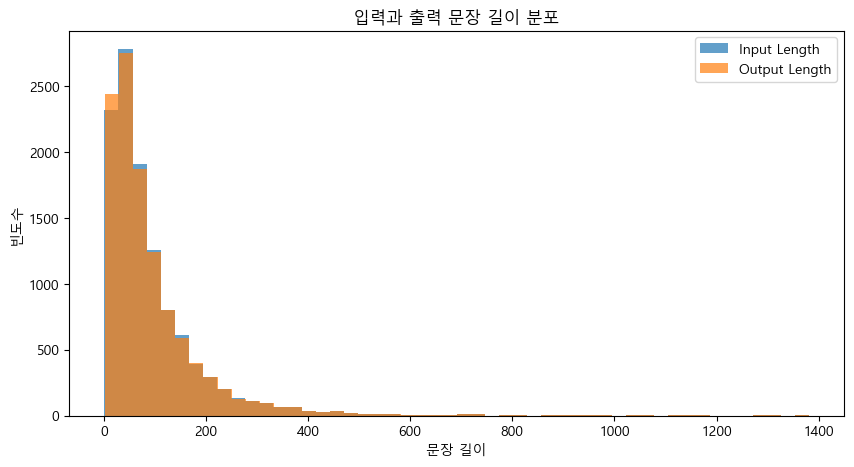

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 입력 데이터 길이 분포
plt.figure(figsize=(10,5))
plt.hist(train_df["input_length"], bins=50, alpha=0.7, label="Input Length")
plt.hist(train_df["output_length"], bins=50, alpha=0.7, label="Output Length")
plt.xlabel("문장 길이")
plt.ylabel("빈도수")
plt.title("입력과 출력 문장 길이 분포")
plt.legend()
plt.show()


#### 2. 자주 등장하는 단어 확인

In [8]:
from collections import Counter
import itertools

# 단어 빈도수 계산 함수
def get_top_words(texts, top_n=20):
    words = list(itertools.chain(*[text.split() for text in texts]))
    word_counts = Counter(words)
    return word_counts.most_common(top_n)

# 입력 데이터에서 가장 많이 등장하는 단어 20개
print("입력 데이터에서 자주 등장하는 단어:")
print(get_top_words(train_df["input"], top_n=20))

# 출력 데이터에서 가장 많이 등장하는 단어 20개
print("\n출력 데이터에서 자주 등장하는 단어:")
print(get_top_words(train_df["output"], top_n=20))


입력 데이터에서 자주 등장하는 단어:
[('얀', 1012), ('않', 667), ('앉', 661), ('한', 589), ('쟐', 407), ('넒뮤', 405), ('념뮤', 403), ('쑤', 388), ('잚', 388), ('슈', 386), ('졺', 367), ('토', 330), ('-', 319), ('좋운', 316), ('ㅎㅎ', 302), ('찰', 301), ('댜', 297), ('효텔', 271), ('잘', 270), ('짤', 270)]

출력 데이터에서 자주 등장하는 단어:
[('너무', 3603), ('안', 2341), ('잘', 1924), ('것', 1261), ('수', 1219), ('정말', 1216), ('다', 1186), ('호텔', 1058), ('좋은', 964), ('있어서', 954), ('뷰가', 939), ('또', 911), ('좀', 838), ('있는', 836), ('좋고', 823), ('진짜', 818), ('깨끗하고', 799), ('게', 772), ('좋아요.', 763), ('깔끔하고', 725)]
